In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist,fashion_mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape) #60000 images with height and width as 28*28
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


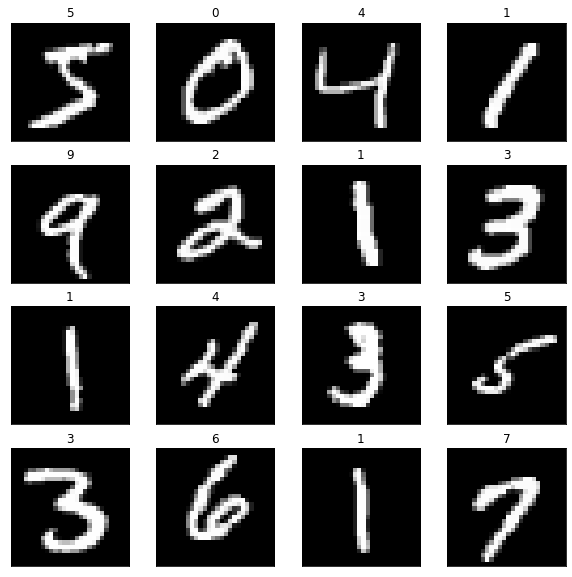

In [4]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([]) #done to not show x axis value
    plt.yticks([])
    plt.imshow(x_train[i],'gray')
    plt.title(y_train[i])
plt.show()

In [5]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [6]:
print(list(set(y_train))) #Unique Labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [7]:
print(x_train[7].shape)
print(x_train[7])

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253
  253 253 174   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252
  252 252 252 158  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252
  252 252 252 252  59   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109 252 252 230 1

In [8]:
x_train=x_train[:6000,:,:]
x_test=x_test[:1000,:,:]
y_train=y_train[:6000]
y_test=y_test[:1000]
print(x_train.shape) 
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6000, 28, 28)
(6000,)
(1000, 28, 28)
(1000,)


### Normalize

In [9]:
x_train=x_train/255
x_test=x_test/255

### Reshape

In [10]:
x_train=x_train.reshape(6000,28,28,1)
x_test=x_test.reshape(1000,28,28,1)
print(x_train.shape) 
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6000, 28, 28, 1)
(6000,)
(1000, 28, 28, 1)
(1000,)


### Building CNN Architecture

In [11]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,AveragePooling2D,Flatten

In [13]:
m1=Sequential()

m1.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Conv2D(32,(3,3),activation='relu'))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Flatten())
m1.add(Dense(32,activation='relu'))
m1.add(Dense(10,activation='softmax')) # we need 10 outputs for classification

m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

In [14]:
m1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [15]:
h1=m1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Train on 6000 samples, validate on 1000 samples
Epoch 1/15
6000/6000 [==============================] - 34s 6ms/sample - loss: 0.7285 - accuracy: 0.7720 - val_loss: 0.2239 - val_accuracy: 0.9270
Epoch 2/15
6000/6000 [==============================] - 30s 5ms/sample - loss: 0.1716 - accuracy: 0.9487 - val_loss: 0.1402 - val_accuracy: 0.9530
Epoch 3/15
6000/6000 [==============================] - 30s 5ms/sample - loss: 0.1170 - accuracy: 0.9657 - val_loss: 0.1227 - val_accuracy: 0.9620
Epoch 4/15
6000/6000 [==============================] - 31s 5ms/sample - loss: 0.0891 - accuracy: 0.9732 - val_loss: 0.1029 - val_accuracy: 0.9710
Epoch 5/15
6000/6000 [==============================] - 31s 5ms/sample - loss: 0.0723 - accuracy: 0.9768 - val_loss: 0.0976 - val_accuracy: 0.9660
Epoch 6/15
6000/6000 [==============================] - 30s 5ms/sample - loss: 0.0596 - accuracy: 0.9810 - val_loss: 0.0919 - val_accuracy: 0.9680
Epoch 7/15
6000/6000 [==============================] - 31s 5ms/sample

In [16]:
r1=pd.DataFrame(h1.history)
r1['Epochs']=h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
10,0.025464,0.993833,0.081908,0.977,10
11,0.016284,0.996333,0.073645,0.980,11
12,0.013637,0.995667,0.086030,0.970,12
13,0.011939,0.996500,0.123310,0.960,13
14,0.019553,0.993500,0.104192,0.969,14


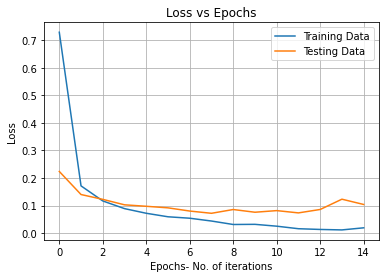

In [17]:
plt.plot(r1['Epochs'],r1['loss'],label='Training Data')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing Data')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs- No. of iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

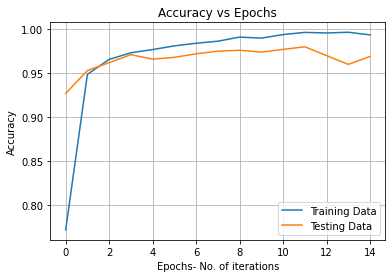

In [18]:
plt.plot(r1['Epochs'],r1['accuracy'],label='Training Data')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='Testing Data')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs- No. of iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [19]:
print(x_test.shape)

(1000, 28, 28, 1)


In [20]:
ypred=m1.predict(x_test)
print(ypred)

[[3.19483502e-11 8.95902513e-15 8.49264126e-08 ... 9.99998689e-01
  1.33831219e-11 1.30157785e-09]
 [1.31537643e-08 6.13623319e-10 1.00000000e+00 ... 1.52868282e-15
  1.65973386e-08 9.31995253e-20]
 [2.56524163e-05 9.99701679e-01 3.44422224e-05 ... 1.66949350e-04
  5.23956487e-06 2.43441406e-07]
 ...
 [1.00000000e+00 7.94485370e-22 3.65491075e-11 ... 1.34036437e-19
  1.64102482e-16 3.20691959e-14]
 [4.72233541e-09 1.38323665e-13 1.37367593e-07 ... 2.32848070e-08
  9.99985695e-01 1.34373022e-05]
 [1.00399575e-07 2.56296928e-10 2.79952728e-09 ... 1.50259226e-07
  3.79050857e-06 9.99975085e-01]]


In [21]:
print(sum(ypred[50]))
print(sum(ypred[700]))
print(sum(ypred[128])) # around 1

1.0000000195264347
1.0000000777613685
1.0000000348905131


In [22]:
print(ypred[7])

[4.4785398e-09 2.4265104e-05 1.3148777e-05 1.3673205e-03 1.7495617e-05
 1.6423437e-06 1.0737861e-10 1.3420644e-08 2.1043143e-03 9.9647176e-01]


In [23]:
ypred_m1=[np.argmax(i)for i in ypred]
print(ypred_m1)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 5, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 5, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 0, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [24]:
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
cm=confusion_matrix(y_test,ypred_m1)
print(cm)
print(classification_report(y_test,ypred_m1))

[[ 84   0   0   0   0   0   1   0   0   0]
 [  0 123   1   0   0   0   0   1   1   0]
 [  0   0 114   0   0   0   0   2   0   0]
 [  1   0   0 101   0   5   0   0   0   0]
 [  0   0   1   0 102   0   0   0   0   7]
 [  0   0   0   0   0  87   0   0   0   0]
 [  2   0   0   0   0   0  85   0   0   0]
 [  0   0   2   0   0   0   0  97   0   0]
 [  1   0   1   1   0   0   0   1  84   1]
 [  0   0   0   0   0   1   0   0   1  92]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        85
           1       1.00      0.98      0.99       126
           2       0.96      0.98      0.97       116
           3       0.99      0.94      0.97       107
           4       1.00      0.93      0.96       110
           5       0.94      1.00      0.97        87
           6       0.99      0.98      0.98        87
           7       0.96      0.98      0.97        99
           8       0.98      0.94      0.96        89
           9       0.92     

### Predictions

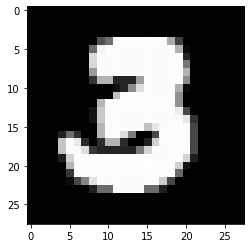

In [26]:
plt.imshow(x_test[200],'gray')
plt.show()

In [28]:
m1.predict(x_test[[200]])

array([[1.9010623e-13, 8.0452841e-16, 1.1075564e-07, 9.9999499e-01,
        7.9890334e-22, 5.9212628e-08, 5.7107764e-18, 1.3852451e-11,
        4.8956636e-06, 7.9253295e-14]], dtype=float32)

In [29]:
m1.predict(x_test[[200]])

array([[1.9010623e-13, 8.0452841e-16, 1.1075564e-07, 9.9999499e-01,
        7.9890334e-22, 5.9212628e-08, 5.7107764e-18, 1.3852451e-11,
        4.8956636e-06, 7.9253295e-14]], dtype=float32)

In [30]:
print(x_test.shape)
print(x_test[200].shape)

(1000, 28, 28, 1)
(28, 28, 1)


In [31]:
res=m1.predict(x_test[[200]])
res

array([[1.9010623e-13, 8.0452841e-16, 1.1075564e-07, 9.9999499e-01,
        7.9890334e-22, 5.9212628e-08, 5.7107764e-18, 1.3852451e-11,
        4.8956636e-06, 7.9253295e-14]], dtype=float32)

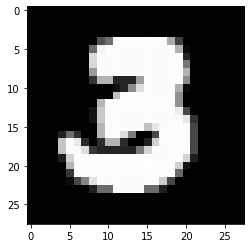

In [32]:
plt.imshow(x_test[200],'gray')
plt.show()

In [33]:
res=m1.predict(x_test[[200]])
res_predict=np.argmax(res)
print(res_predict)

3


In [34]:
print(x_test.shape)
print(x_test[200].shape)

test_img=x_test[200].reshape(1,28,28,1)
print(test_img.shape)

(1000, 28, 28, 1)
(28, 28, 1)
(1, 28, 28, 1)


### Image Index Prediction

In [35]:
# img_index -> 0-999
def test_img_pred(img_idx):
    test_img=x_test[img_idx].reshape(1,28,28,1)
    pred=m1.predict(test_img) #2D numpy array
    res=np.argmax(pred[0])
    
    plt.subplot(1,2,1)
    plt.imshow(x_test[img_idx],'gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f'Actual Val: {y_test[img_idx]}\nPredicted Val {res}')
    plt.title('Test Image')
    
    plt.subplot(1,2,2)
    plt.bar(list(range(10)),pred[0],color='orange')
    plt.xticks(np.arange(10))
    plt.title('Prediction Probability')
    plt.show()
    

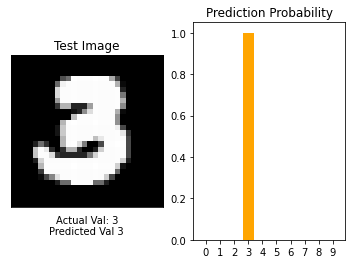

In [36]:
test_img_pred(200)

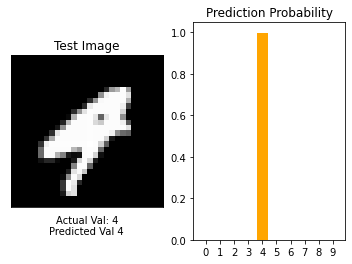

In [37]:
test_img_pred(447)